Psam
Checklist de base
Analyse de forme

    variable target : Psam_sum ; Psam_values (values)
    lignes et colonnes : 466667, 20
    types de variables :
        object     18
        int64       1
        float64     1
        X variables quantitative et Y variables qualitatives
    Analyse des valeurs manquantes : peu de NaN.
        Beaucoup de NaN sector (Only present if type is "Industrial site"), city, country : Empty only for points in the open sea
        
Analyse de fond

    Visualisation de la target :
    Signification des variables :
    Relation Variables / Target :

Analyse plus détaillée

    Analyse des relations directs entre nos différentes variables
        Relation Variable/Variable :
        Nan analyse :

Hypothèses nulle (H0)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [3]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)
data = pd.read_csv('data_pfas.csv', low_memory=False)
df = data.copy()
df.head()

,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,pfas_values,unit,pfas_sum,details,matrix,date,year
0,Known PFAS user,"52,504114","-0,682637",3F,Corby,United Kingdom,Industrial site,NaN,Company website,3F,https://www.3fff.co.uk/,0,Known_PFAS_User_List,[],ng/l,NaN,{},NaN,NaN,NaN
1,Known PFAS user,"50,871865","6,034522",3M,Kerkrade,Netherlands,Industrial site,Manufacture of rubber and plastic products,Company website,3M,https://www.3mdeutschland.de/3M/de_DE/presse-d...,0,Known_PFAS_User_List,[],ng/l,NaN,"{""maps_link"": ""https://goo.gl/maps/z5dYoRaZxkK...",NaN,NaN,NaN
2,Known PFAS user,"50,223409","8,765597",3P - Performance Plastics Products,Karben,Germany,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.3pcorporate.com//wp-content/upload...,0,Known_PFAS_User_List,[],ng/l,NaN,{},NaN,NaN,NaN
3,Known PFAS user,"47,858601","5,347156",3P Performance Plastics Products,Langres,France,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.haute-marne.gouv.fr/content/downlo...,0,Known_PFAS_User_List,[],ng/l,NaN,{},NaN,NaN,NaN
4,Known PFAS user,"39,471674","-0,538828",3P Productos Plásticos Performantes,Valencia,Spain,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.3pcorporate.com//wp-content/upload...,0,Known_PFAS_User_List,[],ng/l,NaN,{},NaN,NaN,NaN


In [4]:
df.shape

(466667, 20)

<Axes: >

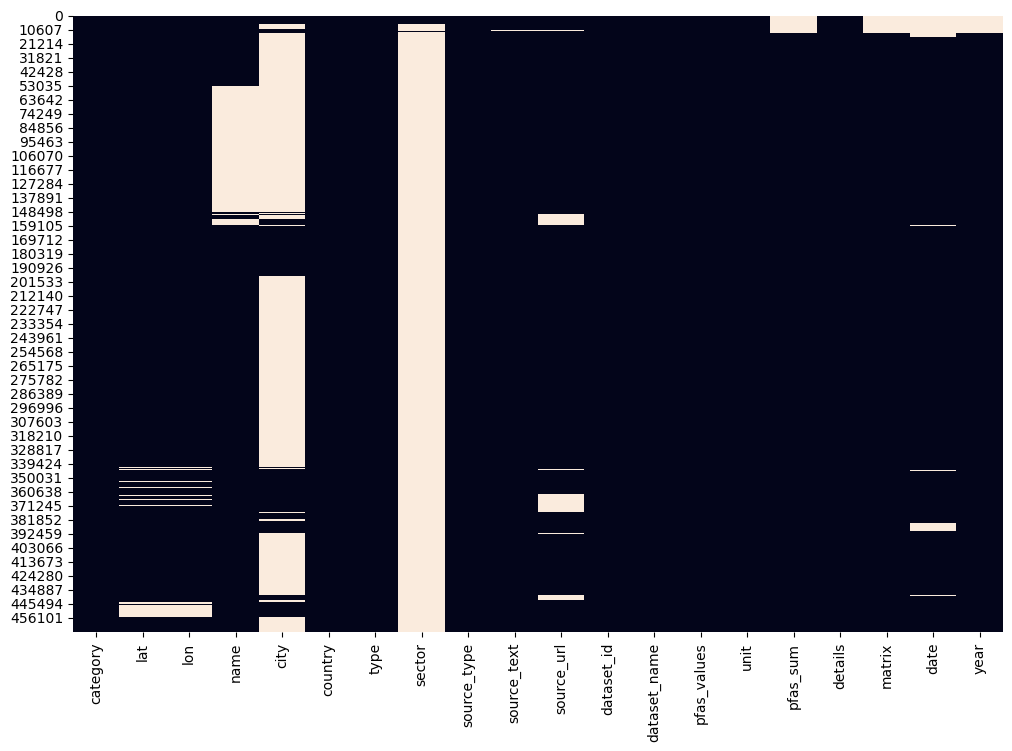

In [5]:
plt.figure(figsize=(12,8))          
sns.heatmap(df.isna(),cbar=False)

In [6]:
df.dtypes.value_counts()

object     18
int64       1
float64     1
Name: count, dtype: int64

In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

category        0.000000
details         0.000000
unit            0.000000
pfas_values     0.000000
dataset_name    0.000000
dataset_id      0.000000
type            0.000000
source_type     0.000000
source_text     0.001196
country         0.001515
matrix          0.027838
year            0.027838
pfas_sum        0.027885
lon             0.034382
lat             0.034382
date            0.051433
source_url      0.060193
name            0.216418
city            0.753985
sector          0.985904
dtype: float64

In [8]:
df['pfas_sum'] = df['pfas_sum'].fillna(-1)

In [9]:
df['pfas_sum'].value_counts()

pfas_sum
0        266023
-1        13013
10         3927
2          3197
1          2986
          ...  
1829          1
2242          1
8495          1
1699          1
40,81         1
Name: count, Length: 23334, dtype: int64

In [10]:
# Étape 1 : Appliquer json.loads si nécessaire et exploser les listes 'pfas_values'
df_exploded = (
    df[['pfas_values']]  # Sélectionner uniquement la colonne 'pfas_values'
    .copy()
    .assign(pfas_values=lambda x: x['pfas_values'].apply(lambda v: json.loads(v) if isinstance(v, str) else v))
    .explode('pfas_values')  # Exploser la colonne pour avoir une ligne par substance
)

# Étape 2 : Filtrer les lignes valides et normaliser les données JSON
df_pfas = (
    df_exploded[df_exploded['pfas_values'].notna()]  # Filtrer les lignes où 'pfas_values' n'est pas NaN
    .assign(pfas_values=lambda x: x['pfas_values'].apply(lambda v: json.loads(v) if isinstance(v, str) else v))  # Appliquer json.loads si nécessaire
    .pipe(lambda x: pd.json_normalize(x['pfas_values']))  # Normaliser les données JSON en colonnes
)

# Étape 3 : Conserver l'index original
df_pfas['index_original'] = df_exploded[df_exploded['pfas_values'].notna()].index

# Étape 4 : Afficher le DataFrame normalisé
df_pfas.head()


,cas_id,unit,substance,value,isomer,less_than,index_original
0,335-67-1,ng/l,PFOA,90.0,NaN,NaN,12991
1,1763-23-1,ng/l,PFOS,40.0,NaN,NaN,12991
2,335-67-1,ng/l,PFOA,200.0,NaN,NaN,12992
3,335-67-1,ng/l,PFOA,41400.0,NaN,NaN,12993
4,1763-23-1,ng/l,PFOS,500.0,NaN,NaN,12993


In [11]:
df_pfas.shape

(3664587, 7)

In [12]:
df_pfas['substance'].value_counts()

substance
PFOS                                                                                                                    302400
PFOA                                                                                                                    275130
PFHxS                                                                                                                   230181
PFHxA                                                                                                                   225560
PFDA                                                                                                                    202400
                                                                                                                         ...  
Phosphonic acid, P-(1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluorooctyl)-, compd. with 4-methylbenzenamine (1:1)          1
PFDPA                                                                                                

In [13]:
df_pfas['cas_id'].value_counts()

cas_id
1763-23-1       364011
335-67-1        334759
355-46-4        230364
307-24-4        225560
335-76-2        202400
                 ...  
335-60-4             1
25065-50-3           1
54009-78-8           1
1263361-03-0         1
755-02-2             1
Name: count, Length: 177, dtype: int64

In [14]:
df_pfas['unit'].value_counts()

unit
ng/l     3118018
ng/kg     546569
Name: count, dtype: int64

In [15]:
df_pfas['isomer'].value_counts()

isomer
linear      62903
branched    58778
Name: count, dtype: int64

<Axes: >

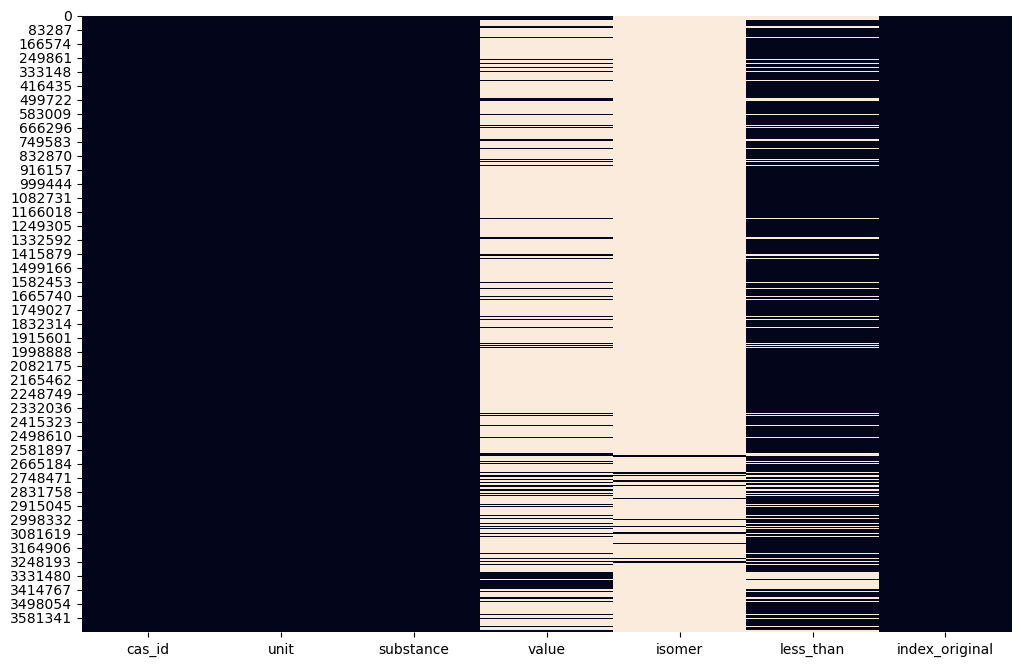

In [16]:
plt.figure(figsize=(12,8))          
sns.heatmap(df_pfas.isna(),cbar=False)

In [17]:
# 1. Grouper par 'cas_id' et créer une liste unique de substances
df_grouped = (
    df_pfas.groupby('cas_id')['substance']
    .apply(lambda x: list(set(x)))  # Supprimer les doublons
    .reset_index()
)

# 2. Calculer le nombre de substances uniques par 'cas_id'
df_grouped['substance_count'] = df_grouped['substance'].apply(len)

# 3. Classer les résultats par 'substance_count' de manière décroissante
df_grouped_sorted = df_grouped.sort_values(by='substance_count', ascending=False)

df_filtered = df_grouped_sorted[df_grouped_sorted['substance_count'] > 1]

C:\Users\User\AppData\Local\Temp\ipykernel_13464\2963444224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='substance_count', y='cas_id', data=df_filtered, palette='viridis')


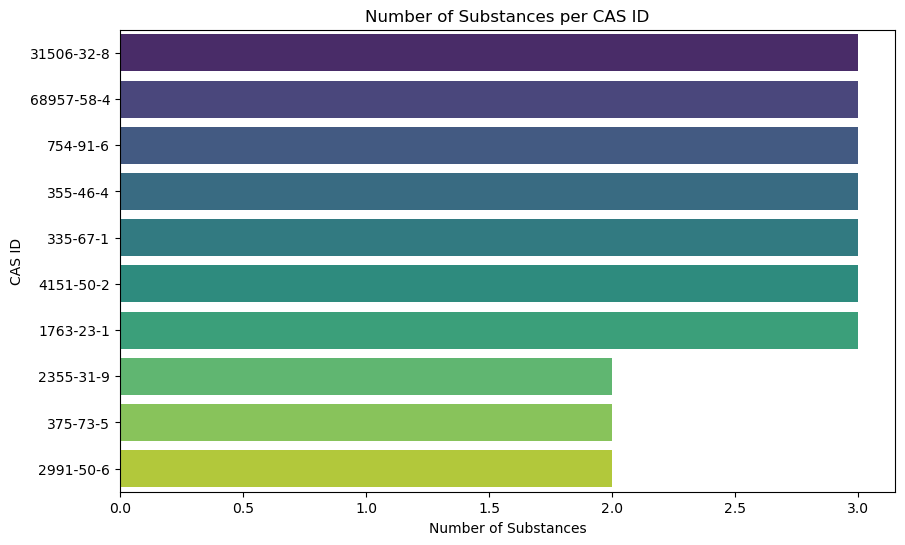

In [18]:
# Créer un barplot du nombre de substances par CAS ID
plt.figure(figsize=(10, 6))
sns.barplot(x='substance_count', y='cas_id', data=df_filtered, palette='viridis')
plt.title('Number of Substances per CAS ID')
plt.xlabel('Number of Substances')
plt.ylabel('CAS ID')
plt.show()

In [19]:
df_filtered

,cas_id,substance,substance_count
68,31506-32-8,"[n-MeFOSA_branched, n-MeFOSA, n-MeFOSA_linear]",3
142,68957-58-4,"[EtFOSAA, EtFOSAA_linear, EtFOSAA_branched]",3
149,754-91-6,"[FOSA_linear, FOSA, FOSA_branched]",3
83,355-46-4,"[PFHxS, PFHxS_branched, PFHxS_linear]",3
73,335-67-1,"[PFOA_linear, PFOA, PFOA_branched]",3
102,4151-50-2,"[N-Et-FOSA_branched, N-Et-FOSA, N-Et-FOSA_linear]",3
37,1763-23-1,"[PFOS_branched, PFOS_linear, PFOS]",3
44,2355-31-9,"[Glycine, N-[(heptadecafluorooctyl)sulfonyl]-N...",2
87,375-73-5,"[PFBS_branched, PFBS]",2
61,2991-50-6,"[N-Et-FOSA-A_linear, N-Et-FOSA-A]",2


In [20]:
df_positif = df_pfas.dropna(subset=['value'])
df_positif = df_positif.drop(columns=['less_than'])
df_positif

,cas_id,unit,substance,value,isomer,index_original
0,335-67-1,ng/l,PFOA,90.0,NaN,12991
1,1763-23-1,ng/l,PFOS,40.0,NaN,12991
2,335-67-1,ng/l,PFOA,200.0,NaN,12992
3,335-67-1,ng/l,PFOA,41400.0,NaN,12993
4,1763-23-1,ng/l,PFOS,500.0,NaN,12993
...,...,...,...,...,...,...
3664543,375-22-4,ng/l,PFBA,2.5,NaN,466666
3664544,2706-90-3,ng/l,PFPeA,1.7,NaN,466666
3664545,307-24-4,ng/l,PFHxA,1.5,NaN,466666
3664546,335-67-1,ng/l,PFOA,1.1,NaN,466666


In [21]:
# Résumé statistique des valeurs de la colonne 'value'
summary_stats = df_positif['value'].describe()
print(summary_stats)


count    6.072170e+05
mean     1.720591e+04
std      8.530167e+05
min     -3.790000e+00
25%      2.369650e+00
50%      8.000000e+00
75%      6.000000e+01
max      1.000000e+08
Name: value, dtype: float64


In [78]:
# Compter la fréquence des différentes substances
substance_count = df_positif['substance'].value_counts()
print(substance_count.head(15))  # Afficher les 15 substances les plus fréquentes


substance
PFOS             131216
PFOA             110175
PFHxA             61609
PFHxS             37120
PFBA              35631
PFHpA             33520
PFPeA             31542
PFBS              30746
PFOS_linear       16492
PFOA_linear       16215
PFOS_branched     13440
PFNA              10912
PFDA               8397
PFOA_branched      7296
6:2 FTSA           6217
Name: count, dtype: int64


In [90]:
substance_count = df_positif['cas_id'].value_counts()
print(substance_count.head(14))  # Afficher substance avec plus de 5000 prélèvements

cas_id
1763-23-1     161148
335-67-1      133686
307-24-4       61609
355-46-4       37226
375-22-4       35631
375-85-9       33520
2706-90-3      31542
375-73-5       30760
375-95-1       10912
335-76-2        8397
27619-97-2      6217
754-91-6        5831
45285-51-6      5526
2706-91-4       5254
Name: count, dtype: int64


In [131]:
# Calculer et trier les concentrations moyennes par cas_id en fonction du nombre d'occurrences
mean_concentration = df_positif.groupby('cas_id')['value'].mean().loc[df_positif['cas_id'].value_counts().index].round(3)
mean_concentration.head(14)


cas_id
1763-23-1      8829.141
335-67-1       9284.867
307-24-4       6282.150
355-46-4      61239.862
375-22-4      19599.052
375-85-9       1890.970
2706-90-3      5698.142
375-73-5      34654.888
375-95-1       1208.178
335-76-2       2039.195
27619-97-2     8560.895
754-91-6      50177.145
45285-51-6        4.784
2706-91-4     73828.367
Name: value, dtype: float64

In [104]:
# Étape 1 : Identifier les 14 cas_id les plus représentés
top_14_cas_id = df_positif['cas_id'].value_counts().nlargest(14).index

# Étape 2 : Filtrer les données pour ne garder que les 14 cas_id les plus représentés
df_filtered = df_positif[df_positif['cas_id'].isin(top_14_cas_id)]

# Étape 3 : Créer un dictionnaire pour associer chaque cas_id à sa ou ses substances correspondantes
cas_id_to_substances = df_positif.groupby('cas_id')['substance'].apply(lambda x: ', '.join(set(x))).to_dict()

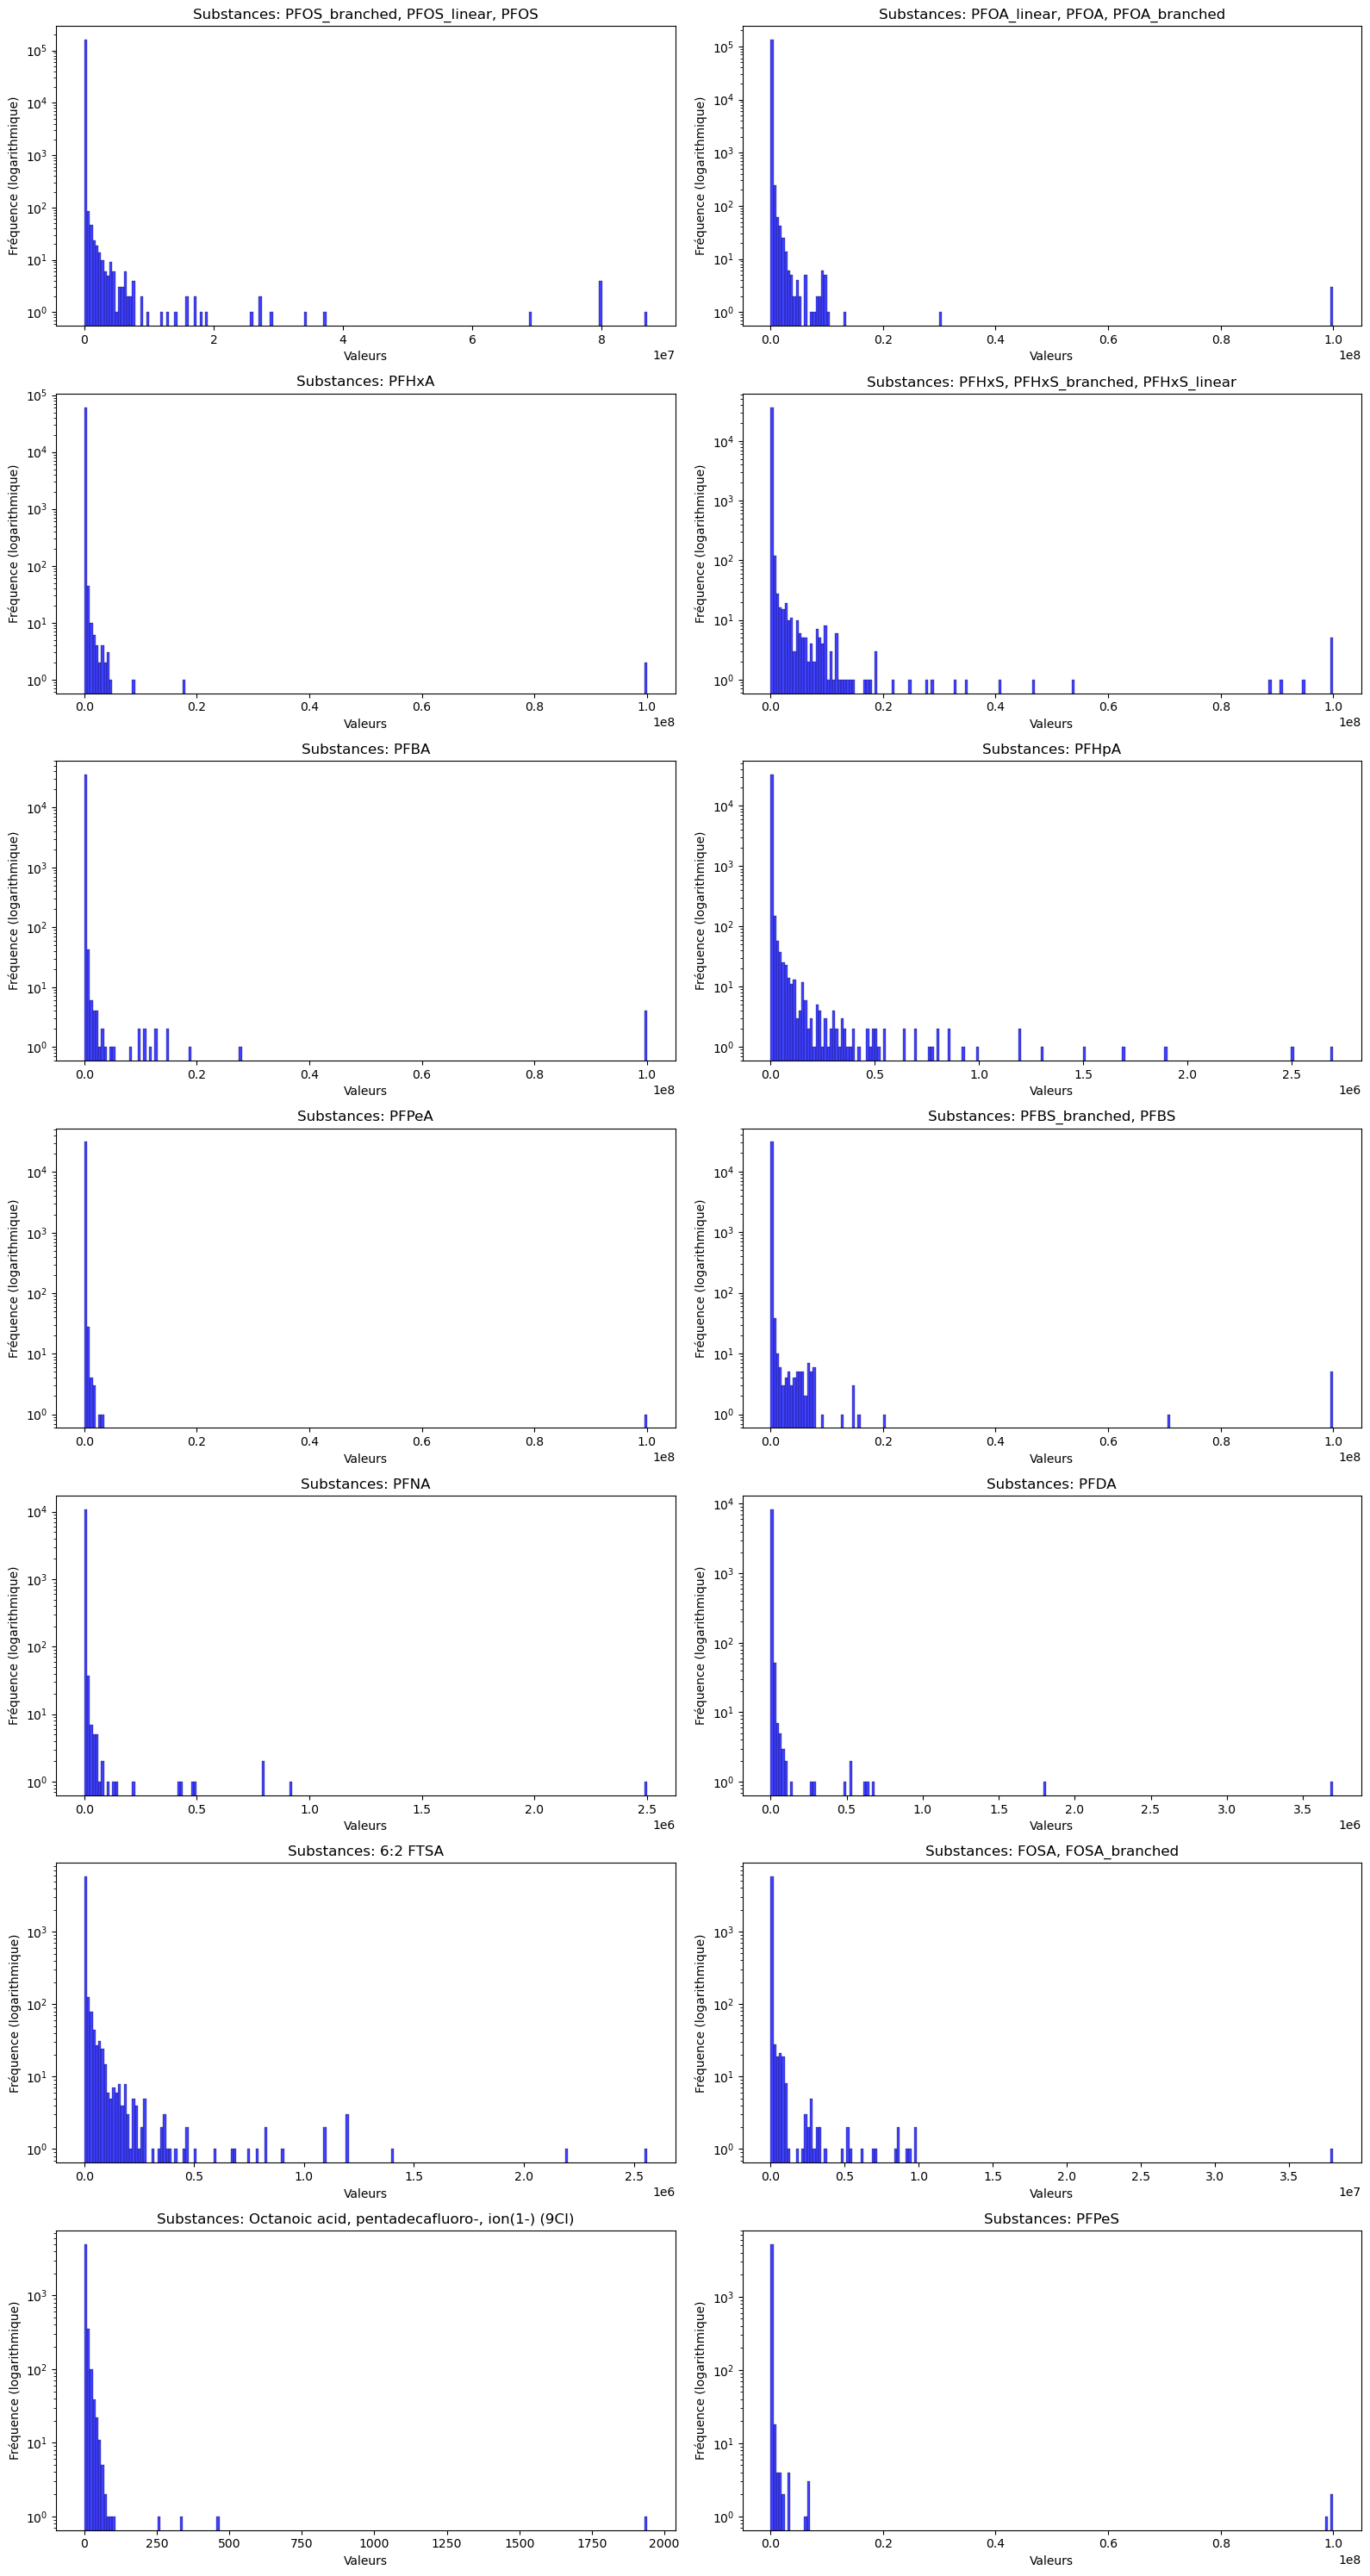

In [109]:
#Créer une figure avec subplots
fig, axes = plt.subplots(7, 2, figsize=(16, 30))  

# Boucle pour tracer un graphique distinct pour chaque cas_id
for i, cas_id in enumerate(top_14_cas_id):
    subset = df_filtered[df_filtered['cas_id'] == cas_id]['value'].dropna()
    
    # Sélectionner l'axe correspondant à ce cas_id
    ax = axes[i // 2, i % 2]  # Trouver la bonne position dans la grille (ligne, colonne)
    
    # Tracer un histogramme des valeurs
    sns.histplot(subset, bins=200, color='blue', kde=False, ax=ax)
    
    # Utiliser une échelle logarithmique sur l'axe Y
    ax.set_yscale('log')
    
    # Récupérer les substances correspondantes au cas_id
    substances = cas_id_to_substances.get(cas_id, 'Substance inconnue')
    
    # Ajouter des titres avec les substances
    ax.set_title(f'Substances: {substances}')
    ax.set_xlabel('Valeurs')
    ax.set_ylabel('Fréquence (logarithmique)')

# Ajuster l'espacement entre les subplots
plt.tight_layout()
plt.show()


In [111]:
df_filtered.to_csv('df_positif_top_14.csv', index=False)